In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("training data: {}, {}".format(x_train.shape, y_train.shape))
print("testing data: {}, {}".format(x_test.shape, y_test.shape))

training data: (60000, 28, 28), (60000,)
testing data: (10000, 28, 28), (10000,)


In [7]:
def print_data(x, y, index):
    plt.imshow(x[index])
    print("Value: {}".format(y[index]))

Training data Index:  36339
Value: 4


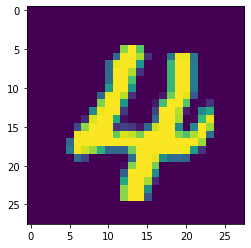

In [17]:
import random
i=random.randint(0, 60000)
print("Training data Index: ", i)
print_data(x_train,y_train,i)

In [21]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
'''
Scaling the training data
'''
scaled_x_train = x_train/255
scaled_x_test = x_test/255

In [22]:
scaled_x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
from pickletools import optimize


cnn_model = keras.Sequential([
    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.fit(scaled_x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3258 - accuracy: 0.9005
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1048 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0789 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0653 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0560 - accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0500 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0433 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0412 - accuracy: 0.9874
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0371 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [28]:
cnn_model.evaluate(scaled_x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0397 - accuracy: 0.9873


[0.039739497005939484, 0.9872999787330627]

In [29]:
y_pred= cnn_model.predict(scaled_x_test)

313/313 [==============================] - 2s 5ms/step


In [31]:
y_pred = [np.argmax(i) for i in y_pred]

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(33.0, 0.5, 'Predicted')

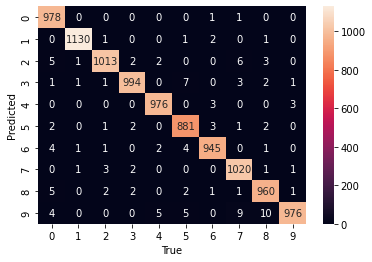

In [35]:
import seaborn as sb

cm = confusion_matrix(y_test, y_pred)

sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True')
plt.ylabel('Predicted')